In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
def plot_returns(env_name, ents, clips, std_scale=0.1):
    with open(f"{env_name}.npy", 'rb') as f:
        returns = np.load(f)
    with open(f"{env_name}_exps.npy", 'rb') as f:
        exps = np.load(f)
    assert len(returns.shape) == 4  # (n_seeds, n_ent, n_clip, n_exp)
    assert returns.shape[1:3] == (len(ents), len(clips))
    print(returns.shape)
    
    for j in range(returns.shape[1]):

        data_j = pd.concat([pd.DataFrame(returns[:, j, k, :], index=[f"clip={clips[k] if clips[k]<1000 else None}"]*returns.shape[0], columns=exps)
                            for k in range(returns.shape[2])], axis=0)

        plt.figure(figsize=(10, 7))
        ax = sns.lineplot(data_j.T, errorbar=("sd", std_scale))
        plt.xlabel("Experience")
        plt.ylabel("Return")
        ax.yaxis.set_major_locator(plticker.MultipleLocator(base=25.0))
        plt.title(f"Ent. bonus={ents[j]}")
        plt.show()
    
    return returns

## Acrobot

(8, 4, 6, 26)


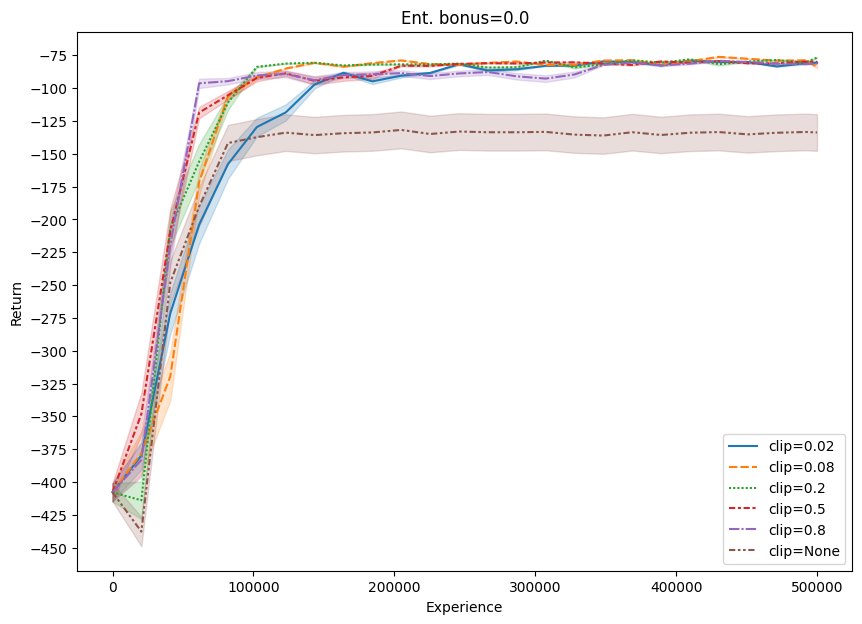

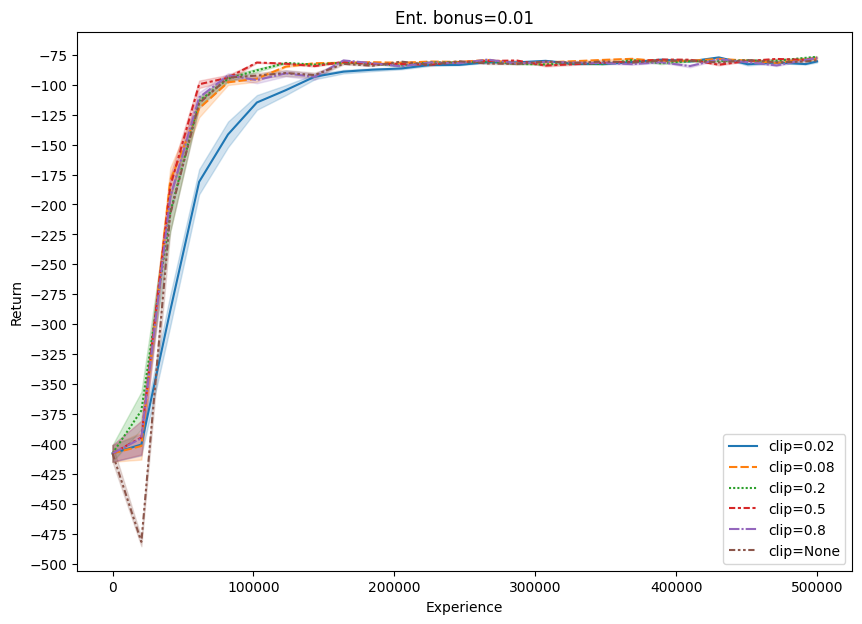

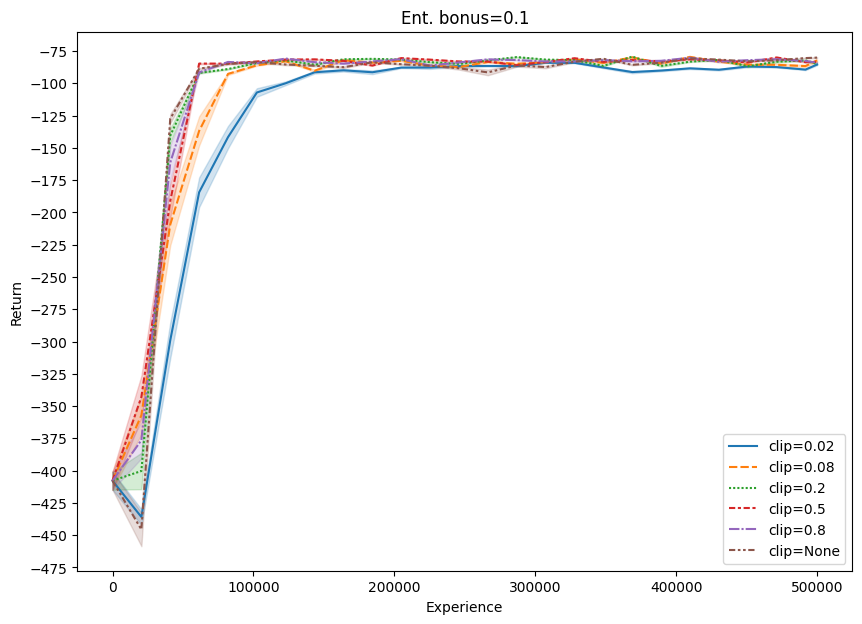

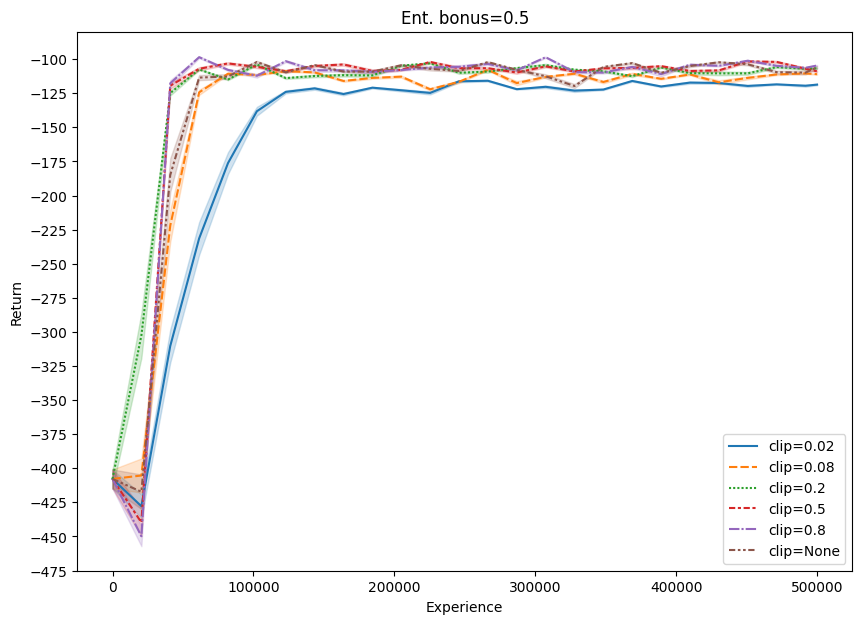

In [3]:
ents = [0.0, 0.01, 0.1, 0.5]
clips = [0.02, 0.08, 0.2, 0.5, 0.8, 1e6]

returns = plot_returns("Acrobot-v1", ents, clips)

## Asterix

(8, 1, 6, 32)


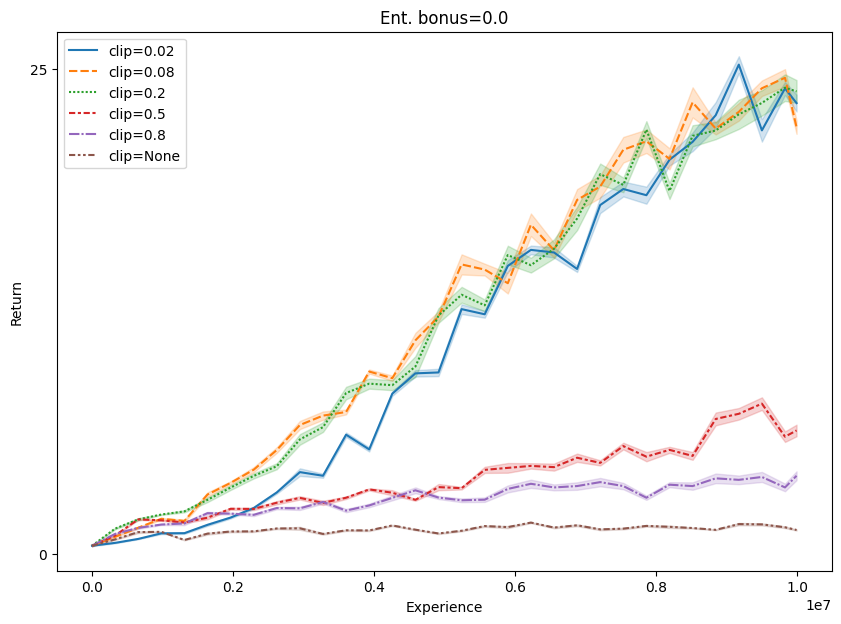

In [4]:
ents = [0.0]
clips = [0.02, 0.08, 0.2, 0.5, 0.8, 1e6]

returns = plot_returns("Asterix-MinAtar", ents, clips)

## Breakout

(8, 1, 6, 32)


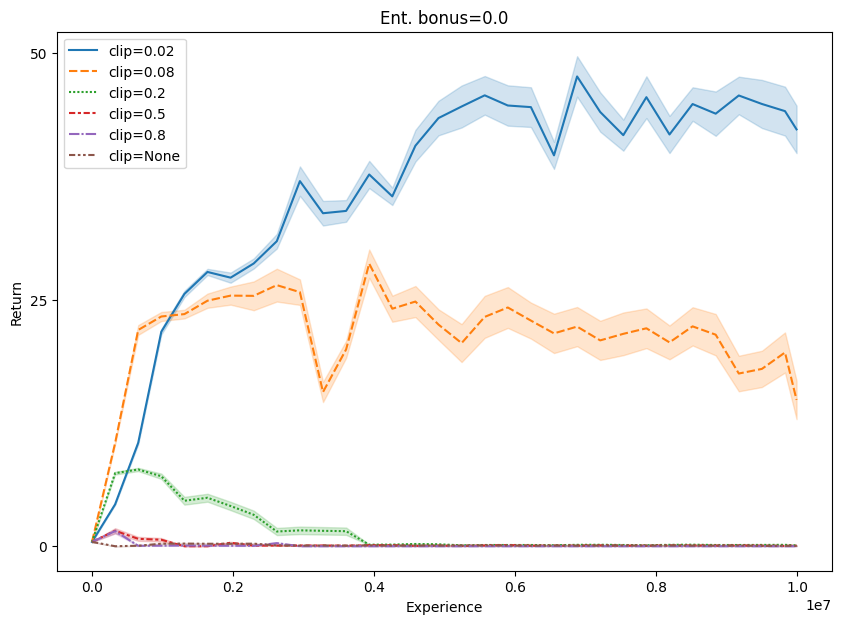

In [5]:
ents = [0.0]
clips = [0.02, 0.08, 0.2, 0.5, 0.8, 1e6]

returns = plot_returns("Breakout-MinAtar", ents, clips)

(8, 1, 6, 32)


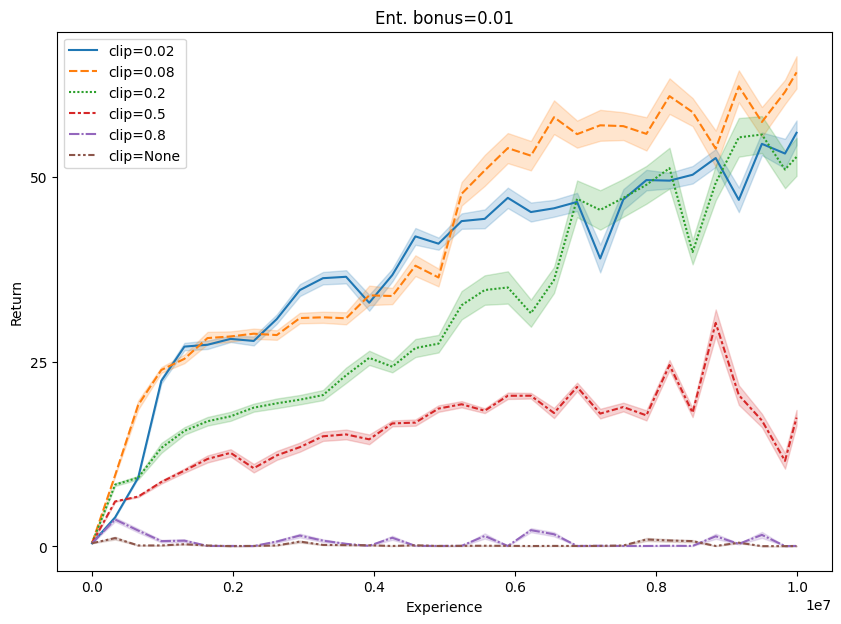

In [18]:
ents = [0.01]

returns = plot_returns("Breakout-MinAtar", ents, clips)

In [29]:
np.mean(returns[:, 0, 2, :], axis=0)

array([ 0.4375   ,  8.3671875,  9.3125   , 13.3359375, 15.640625 ,
       16.945312 , 17.617188 , 18.789062 , 19.375    , 19.867188 ,
       20.492188 , 23.171875 , 25.53125  , 24.335938 , 26.859375 ,
       27.453125 , 32.65625  , 34.710938 , 35.0625   , 31.578125 ,
       36.070312 , 47.0625   , 45.554688 , 47.1875   , 48.960938 ,
       51.210938 , 39.851562 , 49.21875  , 55.382812 , 55.765625 ,
       51.023438 , 52.742188 ], dtype=float32)